# DSP Fundamentals

From [Wikipedia](https://en.wikipedia.org/wiki/Digital_signal_processing):
> Digital signal processing (DSP) is the use of digital processing, such as by computers or more specialized digital signal processors, to perform a wide variety of signal processing operations. The digital signals processed in this manner are a sequence of numbers that represent samples of a continuous variable in a domain such as time, space, or frequency.

![](https://media.giphy.com/media/F0dcjkd0EH720/source.gif)

When we get data from our sensors, we have to be aware that the signals we read will never ever be perfect. **Every sensor you use will have this issue**, and the processing of the readings you make will help you get the actual signal you are looking for.

Today, we will go through different steps in the signal processing chain. Our targets for the day will be:

1. **Get started with an all purpose language for many tasks: [Python](https://www.python.org/)**. Python is used for tasks that range from signal processing, machine learning, data analysis, web development, and many other things! We will see that starting with it is not difficult at all!
2. **Understand the limitations of our systems** (no matter the cost or range)
3. Have some tools to **clean signals and detect events**, and know when we might be doing something wrong
4. Understand **how to log data and sample signals** and don't lose information
5. Get some basics about **1-d and 2-d signal processing**, with the core libraries used for both cases and some inspiration

## Getting started

With this example we will get the first basics for DSP and start using some python packages. For this, we will load some data from a file, see what's inside and then plot it.

Before we get started, some notes about the [Jupyter Notebook](http:/jupyter.org):
- How to run a cell: Press SHIFT+Return
- How to enter/exit cell edit mode: Enter/Escape
- How to add a cell above: Esc + a
- How to add a cell below: Esc + b
- How to make a cell to me Markdown: Esc + m

How to ask for help in **Jupyter Notebook**:

- on an object, you can put help(object) and the documentation will be displayed
- vars(object) to see the available functions
- dir(object) to see the available properties
- SHIFT + TAB (x2 or x3) to get interactive documentation on an object


### Pandas

One of the most important packages in python nowadays is called [pandas](https://pandas.pydata.org/). It's intended to provide efficient data structures and methods to handle large amounts of heterogeneous data, such as numbers, dates, strings...

It's so important, that everyone imports it using the same name: **pd**:

In [1]:
import pandas as pd

Pandas is really powerful and is the basic data framework of many of more complex data analysis and signal processing techniques. The most important items are the Series (1-d) and the DataFrame (2-d very powerful tabular data). 

In [ ]:
help (pd.Series)

In [ ]:
pd.DataFrame

### Numpy

A lot of pandas functionality is built on top of [numpy](https://numpy.org/), a numerical calculation for python. Numpy is generally imported as np:

In [2]:
import numpy as np

### Matplotlib

Finally, matplotlib is a key package for making plots:

In [3]:
import matplotlib.pyplot as plt

### Ice breaking example

Let's read some data:

In [4]:
df = pd.read_csv('data/1d_data.csv')
df.set_index('index', inplace = True);
type(df)

pandas.core.frame.DataFrame

Some information about the data:

In [ ]:
df.head(5)

In [ ]:
df.describe()

Let's see what it contains:

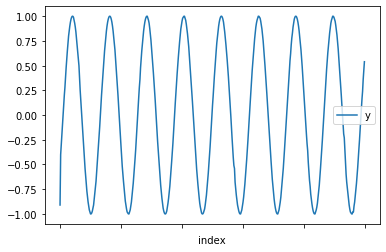

In [5]:
%matplotlib inline
df.plot()

Let's get some of those metrics above manually

In [ ]:
print (df['y'].mean())
print (df['y'].max())
print (df['y'].std())

## Filtering

Filtering is used when we want to reduce the amount of noise that a signal has. We call **noise** to the unwanted (and, in general, unknown) modifications that a signal may suffer during capture, storage, transmission, processing, or conversion. The process of removing the noise from a signal is called **filtering**.

![](http://blog.catchpoint.com/wp-content/uploads/2016/06/Signal-processing.jpg)

### Our new best friend: convolution

Convolution is a DSP technique used in many fields, from 1-d signal analysis to more advanced image processing and video analysis in deep learning algorithms (CNN = Convolutional Neural Networks). It is very important to be familiar with it and how it works.

From [DSP Guide](https://www.dspguide.com/ch6/4.htm):
> Convolution is a formal mathematical operation, just as multiplication, addition, and integration. Addition takes two numbers and produces a third number, while convolution takes two signals and produces a third signal. Convolution is used in the mathematics of many fields, such as probability and statistics. In linear systems, convolution is used to describe the relationship between three signals of interest: the input signal, the impulse response, and the output signal.

![](https://www.dspguide.com/graphics/F_6_8.gif)


> Figure 6-8 illustrates (...) a flow diagram of how convolution occurs. Think of the input signal, x[n], and the output signal, y[n], as fixed on the page. The convolution machine, everything inside the dashed box, is free to move left and right as needed. The convolution machine is positioned so that its output is aligned with the output sample being calculated. Four samples from the input signal fall into the inputs of the convolution machine. These values are multiplied by the indicated samples in the impulse response, and the products are added. This produces the value for the output signal, which drops into its proper place. For example, y[n] is shown being calculated from the four input samples: x[3], x[4], x[5], and x[6].

> To calculate y[7], the convolution machine moves one sample to the right. This results in another four samples entering the machine, x[4] through x[7], and the value for y[7] dropping into the proper place. This process is repeated for all points in the output signal needing to be calculated.

As we will see later on, how we shape the function h[n] is very important, and can be used for many different purposes:
- Filters
- Inverters and attenuators
- Calculate derivatives
- Feature extraction
...

> One problem with convolution occurs when the convolution machine is located fully to the left or right of the input signal. 
In this position, it is trying to receive input from samples: x[-3], x[-2], x[-1] and x[0]. The problem is, three of these samples: x[-3], x[-2] and x[-1] do not exist! 
This same dilemma arises in (d), where the convolution machine tries to accept samples to the right of the defined input signal, points x[9], x[10] and x[11].

> One way to handle this problem is by **inventing the nonexistent samples**. This involves adding samples to the ends of the input signal, with each of the added samples having a value of zero. This is called **padding** the signal with zeros. Instead of trying to access a nonexistent value, the convolution machine receives a sample that has a value of zero. Since this zero is eliminated during the multiplication, the result is mathematically the same as ignoring the nonexistent inputs.

#### Building our own convolution filter

Let's then use our signal before and make some use of the convolution we have just learnt:

In [6]:
from src.formulas import smooth_convolution

In [7]:
help(smooth_convolution)

Help on function smooth_convolution in module src.formulas:

smooth_convolution(y, box_pts)
    Implements 1-d square-box filtering on an input signal, using padding on both sides of the signal
    y: pandas series
    box_pts: must be an odd number



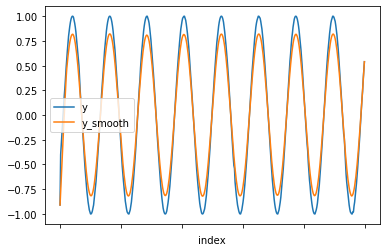

In [8]:
df['y_smooth'] = smooth_convolution(df['y'], 21)
df.plot()

In [9]:
print (len(df['y'].values))
print (len(df['y_smooth'].values))

500
500


Let's have a closer look:

Original signal length: 500
Smooth signal length: 500
Half window size: 11
Padded signal length: 522, original signal + the size of the window (window = 22)


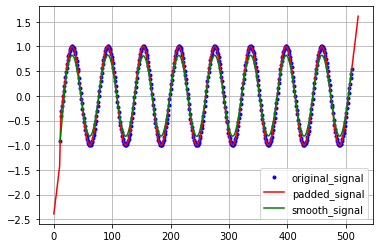

In [10]:
y = df['y'].values
print (f'Original signal length: {len(y)}')
print (f'Smooth signal length: {len(df["y_smooth"].values)}')

half_window = 11
print (f'Half window size: {half_window}')

firstvals = y[0] - np.abs(y[1:half_window+1][::-1] - y[0])
lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
nan_padding = []
y_original = np.concatenate((firstvals*np.nan, list(map(float, y)), lastvals*np.nan))
y_padding = np.concatenate((firstvals, list(map(float, y)), lastvals))
y_smooth = np.concatenate((firstvals*np.nan, df['y_smooth'].values, lastvals*np.nan))
print (f'Padded signal length: {len(y_padding)}, original signal + the size of the window (window = {2*half_window})')

plt.plot(y_original, 'b.', label='original_signal')
plt.plot(y_padding, 'r', label='padded_signal')
plt.plot(y_smooth, 'g', label='smooth_signal')
plt.legend()
plt.grid()

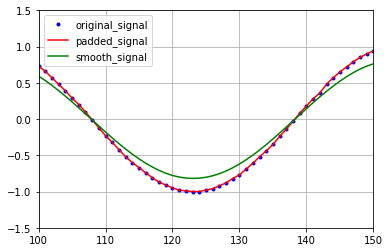

In [11]:
plt.plot(y_original, 'b.', label='original_signal')
plt.plot(y_padding, 'r', label='padded_signal')
plt.plot(y_smooth, 'g', label='smooth_signal')
plt.xlim([100, 150])
plt.ylim([-1.5,1.5])
plt.legend()
plt.grid()

Let's now add some components to our signal (note that the original amplitude is 2 (from -1 to 1):

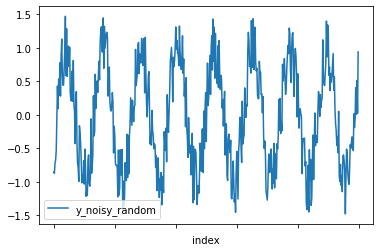

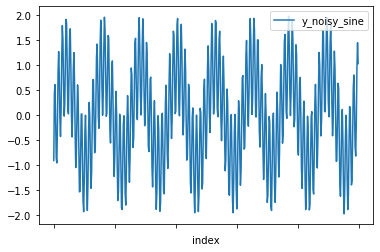

In [12]:
df['y_noisy_random'] = df['y'] + np.random.random(len(df['y'])) - 0.5
df['y_noisy_sine'] = df['y'] + np.sin(np.arange(len(df['y'])))
df.plot(y = 'y_noisy_random')
df.plot(y = 'y_noisy_sine')

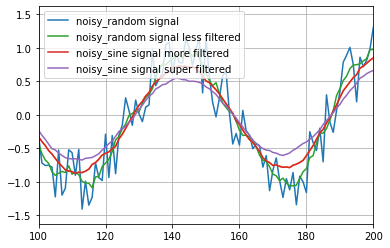

In [13]:
plt.plot(df['y_noisy_random'].values, label = 'noisy_random signal')
plt.plot(smooth_convolution(df['y_noisy_random'], 21))
plt.plot(smooth_convolution(df['y_noisy_random'], 7), label = 'noisy_random signal less filtered')
plt.plot(smooth_convolution(df['y_noisy_random'], 21), label = 'noisy_sine signal more filtered')
plt.plot(smooth_convolution(df['y_noisy_random'], 31), label = 'noisy_sine signal super filtered')
plt.xlim([100, 200])
plt.legend()
plt.grid()
plt.show()

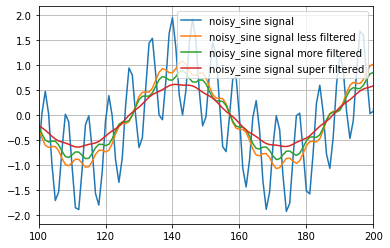

In [14]:
plt.plot(df['y_noisy_sine'].values, label = 'noisy_sine signal')
plt.plot(smooth_convolution(df['y_noisy_sine'], 7), label = 'noisy_sine signal less filtered')
plt.plot(smooth_convolution(df['y_noisy_sine'], 21), label = 'noisy_sine signal more filtered')
plt.plot(smooth_convolution(df['y_noisy_sine'], 31), label = 'noisy_sine signal super filtered')
plt.xlim([100, 200])
plt.legend()
plt.grid()
plt.show()

### Exponential smoothing

Exponential smoothing adds an exponential weighting function to our moving average filter.

In [15]:
from src.formulas import exponential_smoothing

In [ ]:
help (exponential_smoothing)

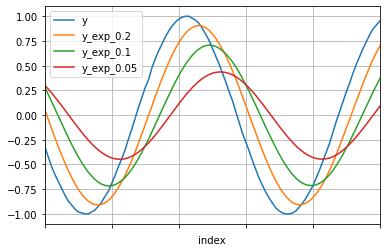

In [16]:
df['y_exp_0.2'] = exponential_smoothing(df['y'], 0.2)
df['y_exp_0.1'] = exponential_smoothing(df['y'], 0.1)
df['y_exp_0.05'] = exponential_smoothing(df['y'], 0.05)
df.plot(y=['y', 'y_exp_0.2', 'y_exp_0.1', 'y_exp_0.05'])
plt.xlim([100, 200])
plt.grid()

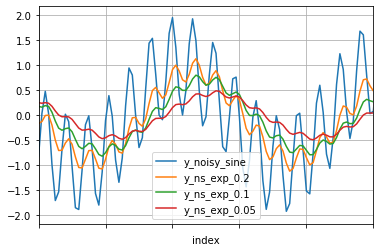

In [17]:
df['y_ns_exp_0.2'] = exponential_smoothing(df['y_noisy_sine'], 0.2)
df['y_ns_exp_0.1'] = exponential_smoothing(df['y_noisy_sine'], 0.1)
df['y_ns_exp_0.05'] = exponential_smoothing(df['y_noisy_sine'], 0.05)
df.plot(y=['y_noisy_sine', 'y_ns_exp_0.2', 'y_ns_exp_0.1', 'y_ns_exp_0.05'])
plt.xlim([100, 200])
plt.grid()

### Caveats

Important facts about filtering:
- Not all the noise will be removed. The size of the window will determine how much you _clean_ the signal.
- If you clean the signal too much, you loose amplitude in it and you loose your original signal
- Some filters can introduce phasing (see below)
- If you use convolution, you need to pad your signal, or trim it accordingly

To cope with this problem, filters are many times applied forwards and backwards. Let's have a look at the scipy library.

### Using libraries

[Scipy](https://docs.scipy.org) is a general purpose scientific package in Python. Scipy signal package can be used for many of this signal processing tasks: https://docs.scipy.org/doc/scipy/reference/signal.html

**scipy.filtfilt**

Apply a digital filter **forward and backward** to a signal. This function applies a linear **digital filter twice**, once forward and once backwards. The combined filter has zero phase and a filter order twice that of the original. The function provides options for handling the edges of the signal.

In [ ]:
from scipy import signal
b, a = signal.butter(8, 0.125)
b, a = signal.ellip(4, 0.01, 120, 0.125)  # Filter to be applied.

for y_signal in ['y_noisy_sine', 'y_noisy_random']:
    sig = df[y_signal].values 
    fgust = signal.filtfilt(b, a, sig, method="gust")
    fpad = signal.filtfilt(b, a, sig, padlen=50)
    plt.plot(sig, 'k-', label=y_signal)
    plt.plot(fgust, 'b-', linewidth=4, label=y_signal + '_gust')
    plt.plot(fpad, 'c-', linewidth=1.5, label=y_signal + '_pad')
    plt.legend(loc='best')
    plt.title(y_signal)
    plt.xlim([-100,100])
    plt.show()

## Peak Detection

The main idea behind detecting peaks is to make a sweep of our signal, looking for small areas that look like peaks. We can do so by multiplying our signal by a shifting "peak" ([wavelet](https://en.wikipedia.org/wiki/Wavelet) in formal terms) and see when the product of these two signals has a significant value. As we know, the product of two signals is called convolution, and we will use it again for finding peaks in our signals.

### Easy example
In this example, we will use a cwt to sweep our signal looking for peaks. We need to know roughly what our peaks will look like, so that we have a range for our search.

In [ ]:
from scipy import signal
xs = df.index
peakind = signal.find_peaks_cwt(df['y'], np.arange(1,10))

print (peakind)
print (xs[peakind])
plt.plot(df['y'].values)
plt.plot(peakind, df.iloc[peakind, df.columns.get_loc("y")], 'r.')
plt.show()

When we have noise, thing get a bit trickier...

In [ ]:
from scipy import signal
xs = df.index
column = "y_noisy_random"
peakind = signal.find_peaks_cwt(df[column], np.arange(15,20))

plt.plot(df[column].values)
plt.plot(peakind, df.iloc[peakind, df.columns.get_loc(column)], 'r.')
plt.show()

In [ ]:
window_width = 14
half_window = (window_width)//2
window = signal.general_gaussian(window_width, p=0.5, sig=20)
# Padding
firstvals = y[0] - np.abs(y[1:half_window][::-1] - y[0])
lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
padded_signal = np.concatenate((firstvals, list(map(float, df[column])), lastvals))

filtered = signal.fftconvolve(window, padded_signal, mode="valid")
filtered = (np.average(df[column]) / np.average(filtered)) * filtered
print (df.shape)
print (filtered.shape)
df[column + '_filtered'] = filtered

peakidx = signal.find_peaks_cwt(df[column + '_filtered'], np.arange(10,15), noise_perc=0.1)

plt.plot(df[column].values)
plt.plot(df[column + '_filtered'].values)
plt.plot(peakind, df.iloc[peakind, df.columns.get_loc(column + '_filtered')], 'r.')
plt.show()

In [ ]:
window_width = 14
half_window = (window_width)//2
window = signal.general_gaussian(window_width, p=0.5, sig=20)
# Without padding
filtered = signal.fftconvolve(window, df[column], mode="full")
filtered = (np.average(df[column]) / np.average(filtered)) * filtered
print (df.shape)
print (filtered.shape)
df[column + '_filtered'] = np.roll(filtered[:-window_width+1], -half_window)
peakidx = signal.find_peaks_cwt(df[column + '_filtered'], np.arange(10,15), noise_perc=0.1)

plt.plot(df[column].values)
plt.plot(df[column + '_filtered'].values)
plt.plot(peakind, df.iloc[peakind, df.columns.get_loc(column + '_filtered')], 'r.')
plt.show()

## Derivative

To perform a derivative, we can use again our convolution friend, but in this case

In [ ]:
import math
def conv_derivative(y, box_pts):
    '''
        Calculate derivative of input signal using a convolutional filter
        box_pts has to be even number
    '''
    
    half_window = (box_pts-1) // 2

    box = np.zeros(box_pts)
    box[half_window+1:] = np.arange(half_window)+1
    for index_box in range(half_window): box[index_box] = - box[-(index_box+1)]
    print (box)
    box = - box/((math.sqrt(half_window-1))*(half_window-1))
    # Using svagol filter coefficients we need to compensate for window size. 
    # This is just an approximation and won't work with window > 10
    
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, list(map(float, y)), lastvals))
    y_derivative = np.convolve(y, box, mode='valid')
    return y_derivative

In [ ]:
list_plot = ['y']
for derivative_number in [5, 7]:
    df[f'y_derivative_{derivative_number}'] = conv_derivative(df['y'], derivative_number)
    list_plot.append(f'y_derivative_{derivative_number}')
df.plot(y = list_plot)
plt.xlim([20, 100])

plt.grid()

## General guidelines

- Always try to remove the noise from the signal before doing anything else in it
- Be careful with numerical problems - small numbers are not handled well numerically
- Use filters with caution, try different options before going for a final selection of parameters
- There is no general set of parameters for everything
- Do not try to find a solution that suits you, but that suits your problem. Quick solutions are often not extrapolated out of laboratory conditions

## References and more resources

### Python intro
- Python beginner's guide: https://wiki.python.org/moin/BeginnersGuide
- Conda documentation: https://docs.conda.io/projects/conda/en/latest/index.html
- Install an environment from an environment yml file: https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-from-an-environment-yml-file

### DSP Specifics
- Notes on Convolution from DSP Guide: "The Scientist and Engineer's Guide to Digital Signal Processing, copyright ©1997-1998 by Steven W. Smith. For more information visit the book's website at: www.DSPguide.com"
- [Noise and sampling](https://en.wikipedia.org/wiki/Noise_(signal_processing))
- [Scipy Package](https://docs.scipy.org/doc/scipy/reference/)
- [Pandas package](https://pandas.pydata.org/)
- [Numpy](https://numpy.org/)
- [Scipy Lectures](https://scipy-lectures.org/)
- [Scikits](https://scikits.appspot.com/scikits)